In [139]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [140]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/mysejahtera/checkin_malaysia.csv')

In [141]:
# convert date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
# filter data by date
fdata = data[data['date'] >= data[data['checkins']
                                  == max(data['checkins'])].iloc[-1]['date']]


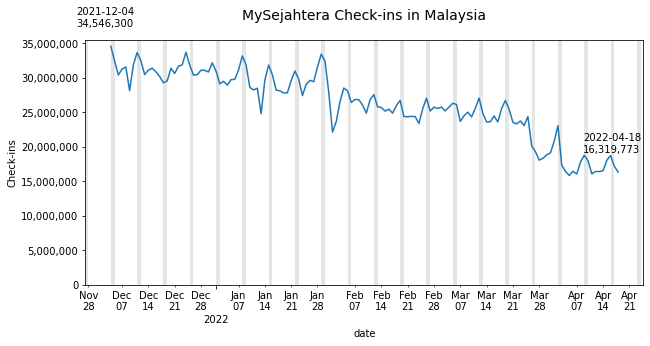

In [142]:
df = fdata.set_index('date')
# keep only the first column
df = df.iloc[:, 0]
ax = df.plot(x_compat=True, figsize=(10, 5), legend=None, ylabel='Check-ins')
# reset y limits to display highlights without gaps)
ax.set_ylim(bottom=0, top=ax.get_ylim()[1])

# Highlight weekends based on the x-axis units
xmin, xmax = ax.get_xlim()
days = np.arange(np.floor(xmin), np.ceil(xmax)+2)
weekends = [(dt.weekday() >= 5)
            for dt in mdates.num2date(days)]
ax.fill_between(days, *ax.get_ylim(), where=weekends, facecolor='k', alpha=.1)
ax.set_xlim(xmin, xmax)  # set limits back to default values


# show year and month in the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(
    bymonthday=np.arange(0, 31, step=7)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b\n%d'))

# Additional formatting
ax.figure.autofmt_xdate(rotation=0, ha='center')
# comma separate thousands for y-axis
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))
title = 'MySejahtera Check-ins in Malaysia'
ax.set_title(title, pad=20, fontsize=14)
# annotate first and last value with date
a = df.index[0], df.index[-1]
b = df.iloc[0], df.iloc[-1]
for x,y in zip(a, b):
    ax.annotate(f"{x.date()}\n{y:,}", xy=(x,y), xytext=(-35,20), textcoords='offset points')

In [143]:
# enlarge the plot area
fig = ax.get_figure()
fig.set_size_inches(10, 5)
# white background
fig.patch.set_facecolor('white')
# save the plot
fig.savefig('checkins.png', dpi=300)
